In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py


import warnings
warnings.filterwarnings('ignore')

py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

%matplotlib inline
# Plot in SVG format since this format is more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [4]:
path = 'c:/temp/heart.csv'
df = pd.read_csv(path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [13]:
num_cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

df['sex'] = df['sex'].apply(lambda x: 'male' if x == 1 else 'female')
df['exang'] = df['exang'].map({1: 'Yes', 0:'No'})

df.shape


(920, 16)

In [12]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     0 non-null      object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [45]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [29]:
plt.rcParams['figure.figsize']= (12,8) # figure size
sns.set_style('darkgrid') # Style

Text(0.5, 1.0, 'Age distribuition')

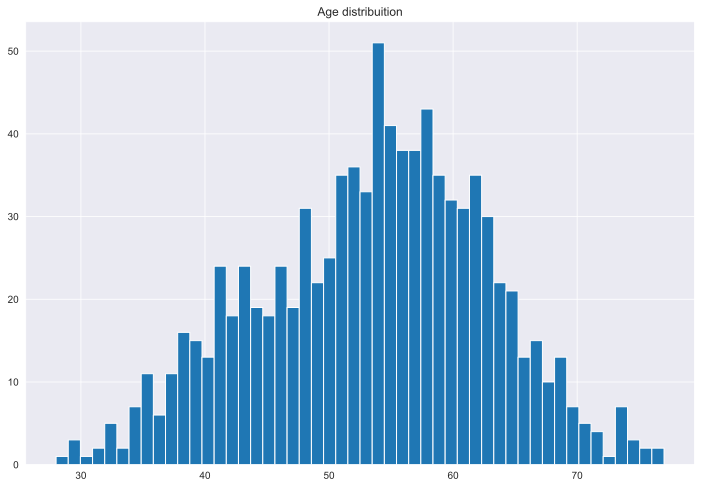

In [49]:
df['age'].hist(grid=True, bins=50); 
plt.title('Age distribuition')

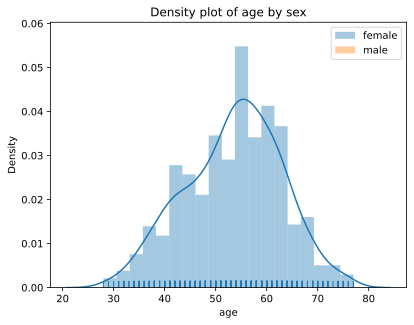

In [5]:
df['sex'] = df['sex'].apply(lambda x: 'male' if x == 1 else 'female')
df['exang'] = df['exang'].map({1: 'Yes', 0:'No'})

sns.distplot(df[df['sex']=='female']['age'], rug=True, hist=True, label='female')
sns.distplot(df[df['sex']=='male']['age'], rug=True, hist=True, label='male')
plt.legend()
plt.title('Density plot of age by sex');

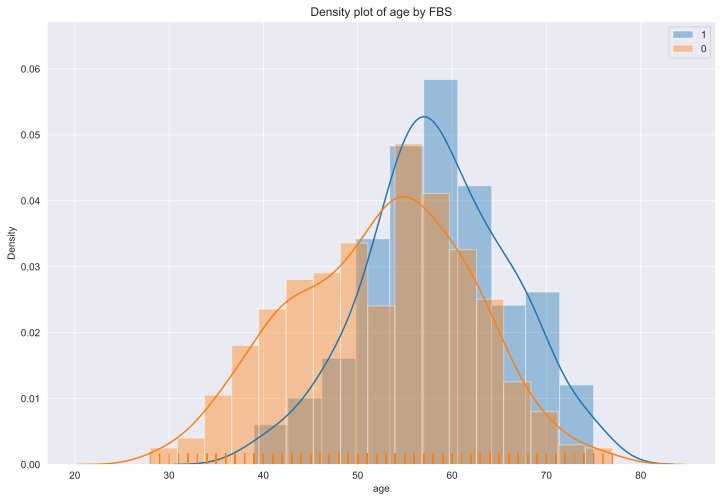

In [36]:
sns.distplot(df[df['fbs']==1]['age'], rug=True, hist=True, label='1')
sns.distplot(df[df['fbs']==0]['age'], rug=True, hist=True, label='0')
plt.legend()
plt.title('Density plot of age by FBS');

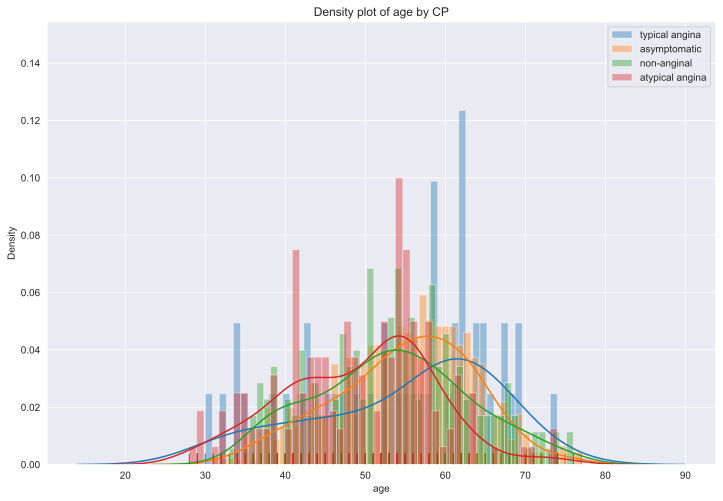

In [59]:
sns.distplot(df[df['cp']=='typical angina']['age'], rug=True, hist=True, label='typical angina', bins=50)
sns.distplot(df[df['cp']=='asymptomatic']['age'], rug=True, hist=True, label='asymptomatic', bins=50)
sns.distplot(df[df['cp']=='non-anginal']['age'], rug=True, hist=True, label='non-anginal', bins=50)
sns.distplot(df[df['cp']=='atypical angina']['age'], rug=True, hist=True, label='atypical angina', bins=50)
plt.legend()
plt.title('Density plot of age by CP');

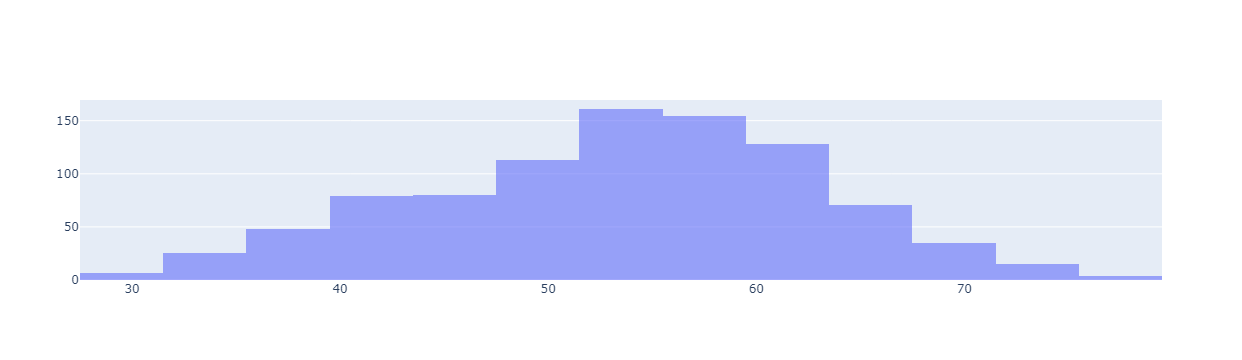

In [65]:
age = df['age']
layout = go.Layout(barmode='overlay')
data = go.Histogram(x=age, opacity=0.6, xbins={'size': 4})
fig = go.Figure(data=[data], layout=layout)
py.offline.iplot(fig)

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

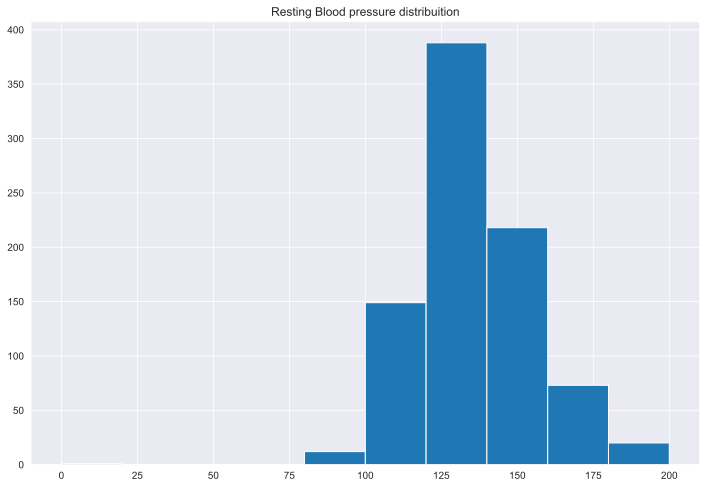

In [72]:
df['trestbps'].hist(grid=True, bins=10)
plt.title('Resting Blood pressure distribuition')

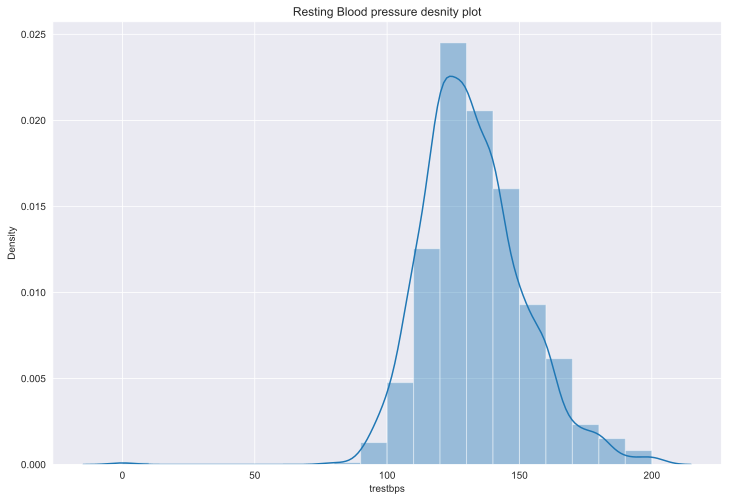

In [77]:
sns.distplot(df['trestbps'], bins=20)
plt.title('Resting Blood pressure desnity plot');

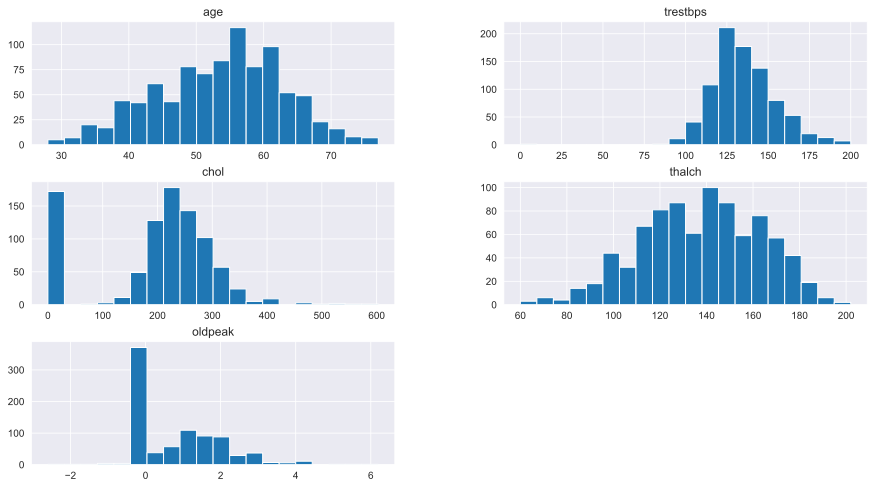

In [86]:
plt.rcParams['figure.figsize']= (15,8) # reajustar o tamanho da figura 

df[[ 'age','trestbps', 'chol', 'thalch', 'oldpeak']].hist(bins=20);

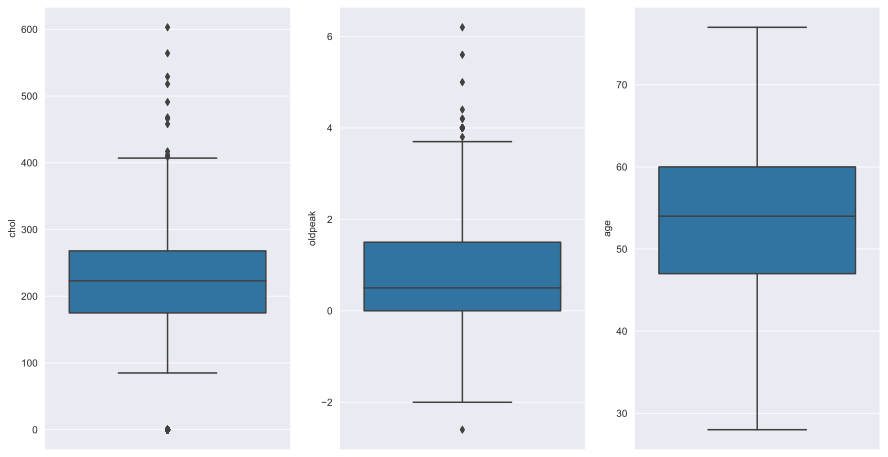

In [94]:
fig, axes = plt.subplots(nrows = 1, ncols=3)

sns.boxplot(y='chol', data=df, orient='h', ax=axes[0])
sns.boxplot(y='oldpeak', data=df,  orient='h', ax=axes[1]);
sns.boxplot(y='age', data=df,  orient='h', ax=axes[2]);


In [95]:
df['target'].value_counts()

KeyError: 'target'

In [6]:
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

ValueError: Could not interpret input 'target'

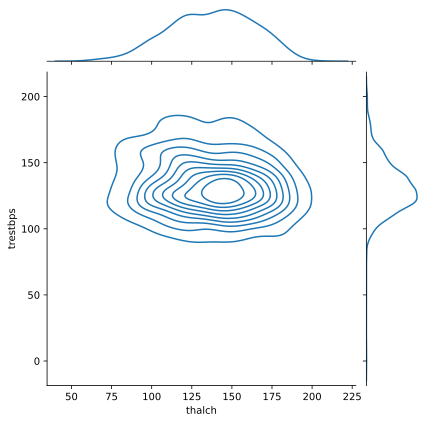

In [8]:
sns.jointplot(kind='kde', x='thalch', y='trestbps', data=df)